### Question 1 - Data Cleaning

#### Date Fields

1. Identify what percentage of date fueled entries that are not proper dates.
[1]

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load the dataset.
# The 'low_memory=False' argument is used to suppress the DtypeWarning,
# as the cleaning process will handle mixed data types later.
df = pd.read_csv('logbook_assignment1.csv', low_memory=False)

# Standardize column names by converting to lowercase and replacing spaces with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')

# --- Question 1.1.1: Percentage of invalid dates ---
# Convert the 'date_fueled' column to datetime.
# `dayfirst=True` is a good practice as the nominal format is DD mmm YYYY[cite: 26].
# `errors='coerce'` correctly turns non-date values into NaT.
df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce', dayfirst=True)

# Count the number of invalid dates (which are now NaT).
invalid_dates_count = df['date_fueled_converted'].isna().sum()

# Calculate the total number of entries.
total_entries = len(df)

# Calculate the percentage.
percentage_invalid = (invalid_dates_count / total_entries) * 100

# Print the result in a clean format.
print(f"\n Percentage of 'date fueled' entries that are not proper dates: {percentage_invalid:.2f}%")

/tmp/ipykernel_1809/553801491.py:18: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce', dayfirst=True)
/tmp/ipykernel_1809/553801491.py:18: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce', dayfirst=True)
/tmp/ipykernel_1809/553801491.py:18: FutureWarning: Parsed string "14:51H
256.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future vers


 Percentage of 'date fueled' entries that are not proper dates: 11.66%


Based on the code execution, the percentage of entries in the date_fueled column that are not proper dates is 11.66%. This confirms the data is messy, as mentioned in the assignment brief, with some users entering descriptions instead of dates.

2. If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy. [1]

In [10]:
import pandas as pd
import numpy as np

# Load the dataset
# You can add low_memory=False to suppress the DtypeWarning if you wish
df = pd.read_csv('logbook_assignment1.csv')

# Standardize column names (Crucial step!)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# --- 1. Convert 'date_fueled' to a datetime column ---
# This step creates the 'date_fueled_converted' column.
df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# --- 2. Convert 'date_captured' to a datetime column ---
df['date_captured_converted'] = pd.to_datetime(df['date_captured'], errors='coerce')

# --- 3. Fill NaT values in 'date_fueled_converted' with 'date_captured_converted' ---
# Now you can safely use 'date_fueled_converted' because it exists.
df['date_fueled_cleaned'] = df['date_fueled_converted'].fillna(df['date_captured_converted'])

# You can now drop the intermediate columns if you want
# df.drop(columns=['date_fueled_converted', 'date_captured_converted'], inplace=True)

# Check the first few rows to confirm the new column exists and is filled
print("\nDataFrame head after date cleaning:")
print(df[['date_fueled', 'date_captured', 'date_fueled_cleaned']].head())

/tmp/ipykernel_1809/929310860.py:13: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/929310860.py:13: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/929310860.py:13: FutureWarning: Parsed string "14:51H
256.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead p


DataFrame head after date cleaning:
                                         date_fueled date_captured  \
0  Cooling System, Heating System, Lights, Spark ...    Apr 7 2022   
1                                         Nov 7 2012   Aug 30 2016   
2                                        Sep 22 2012   Sep 28 2012   
3                                         May 4 2019    May 4 2019   
4                                        Feb 15 2022   Feb 15 2022   

  date_fueled_cleaned  
0          2022-04-07  
1          2012-11-07  
2          2012-09-22  
3          2019-05-04  
4          2022-02-15  


3. Convert the column to a date format, setting any invalid date fueled entries
to NaT. [2]

In [ ]:
# Re-apply the conversion to the cleaned column
df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled_cleaned'], errors='coerce')

4. Remove dates that are in the future, or dates that are earlier than 2005.
[1]

In [70]:
# --- 1.1.4: Remove dates that are in the future, or earlier than 2005 ---
min_date = pd.to_datetime('2005-01-01')
current_date = pd.to_datetime('now')
df = df[(df['date_fueled_cleaned'] >= min_date) & (df['date_fueled_cleaned'] <= current_date)].copy()
print(f"Number of rows after filtering dates: {len(df)}")
#print(rows removed from total, then rows remaining)

Number of rows after filtering dates: 1174136


5. Plot the distribution of fueling dates and comment on the results. [2]

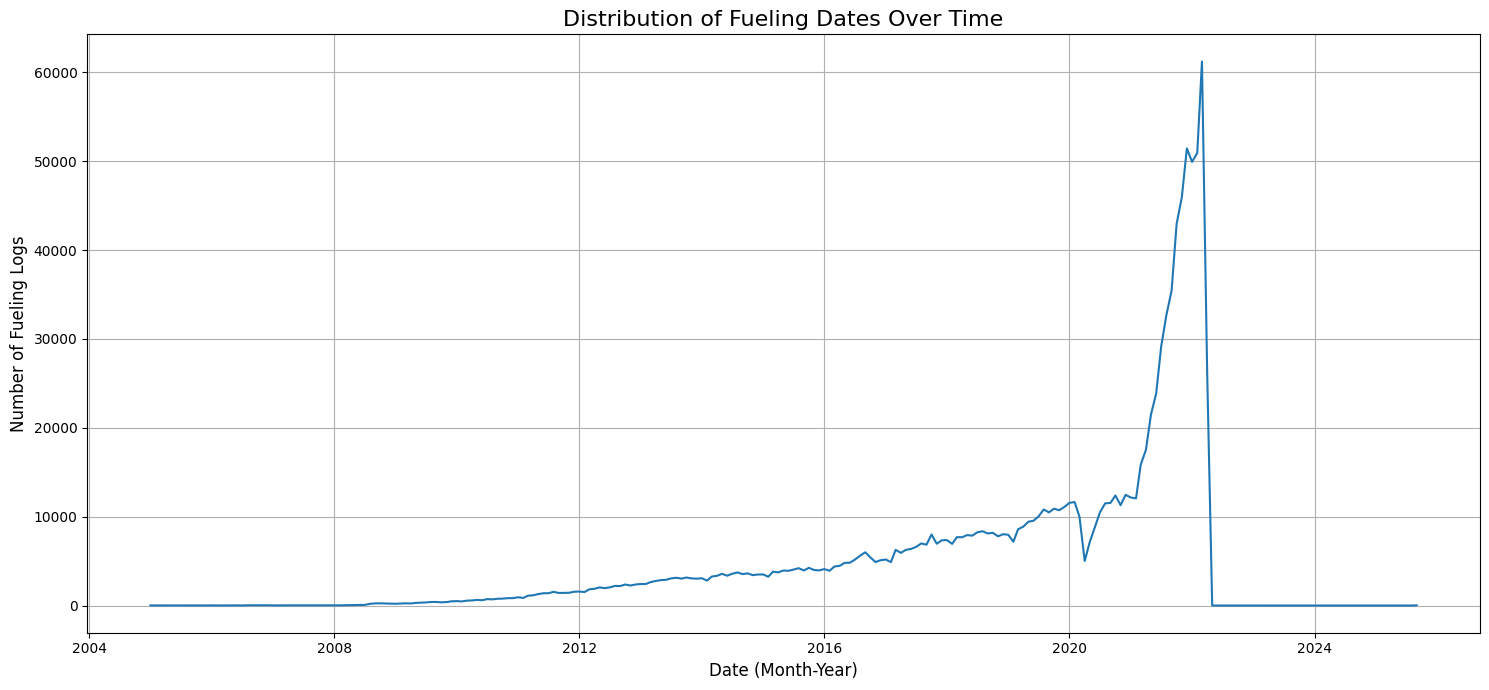

In [18]:
# Drop rows where the cleaned date is a null value for plotting
df_cleaned_for_plot = df.dropna(subset=['date_fueled_cleaned']).copy()

# Extract month and year to create a time series for plotting
df_cleaned_for_plot['fueling_month_year'] = df_cleaned_for_plot['date_fueled_cleaned'].dt.to_period('M')

# Group by the month/year and count the number of entries for each period
fueling_counts = df_cleaned_for_plot.groupby('fueling_month_year').size().to_frame('count')
fueling_counts.index = fueling_counts.index.to_timestamp()

# Create the plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=fueling_counts, x=fueling_counts.index, y='count')
plt.title('Distribution of Fueling Dates Over Time', fontsize=16)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('Number of Fueling Logs', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Comments on plot 
mention the covid pandemic

/tmp/ipykernel_1809/420795038.py:18: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/420795038.py:18: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/420795038.py:18: FutureWarning: Parsed string "14:51H
256.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead p

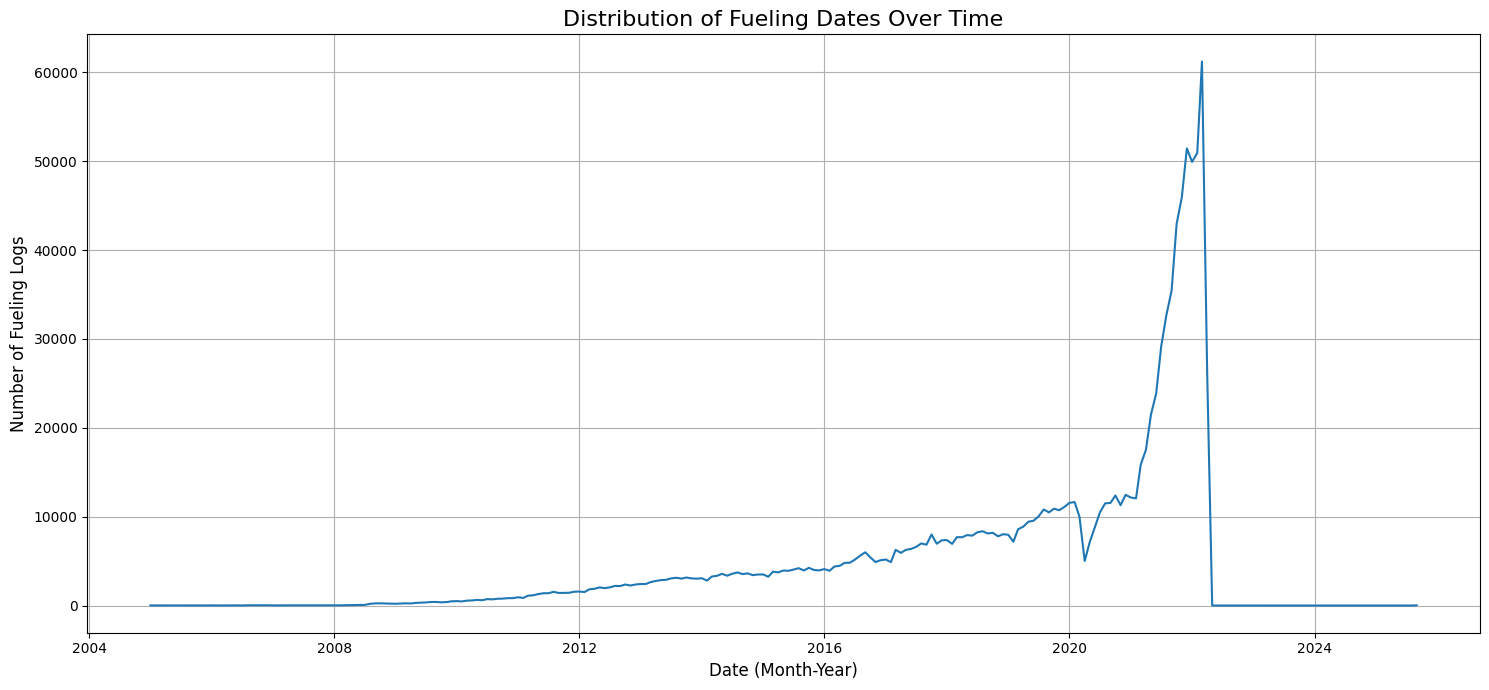

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Load the dataset
df = pd.read_csv('logbook_assignment1.csv')

# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# --- 1.1.1: Identify percentage of invalid dates ---
df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# --- 1.1.2: Fill invalid 'date_fueled' entries with 'date_captured' ---
df['date_captured_converted'] = pd.to_datetime(df['date_captured'], errors='coerce')
df['date_fueled_cleaned'] = df['date_fueled_converted'].fillna(df['date_captured_converted'])

# --- 1.1.3: Convert the column to date format and set invalid entries to NaT ---
df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled_cleaned'], errors='coerce')

# --- 1.1.4: Remove dates that are in the future, or earlier than 2005 ---
min_date = pd.to_datetime('2005-01-01')
current_date = pd.to_datetime('now')
df = df[(df['date_fueled_cleaned'] >= min_date) & (df['date_fueled_cleaned'] <= current_date)].copy()

# --- 1.1.5: Plot the distribution of fueling dates and comment on the results ---
# Drop rows where 'date_fueled_cleaned' is NaT for plotting
df_cleaned = df.dropna(subset=['date_fueled_cleaned'])

# Extract month and year for a more detailed plot
df_cleaned['fueling_month_year'] = df_cleaned['date_fueled_cleaned'].dt.to_period('M')

# Group by month/year and count the number of entries
fueling_counts = df_cleaned.groupby('fueling_month_year').size().to_frame('count')
fueling_counts.index = fueling_counts.index.to_timestamp()

# Plot the distribution of fueling dates over time
plt.figure(figsize=(15, 7))
sns.lineplot(data=fueling_counts, x=fueling_counts.index, y='count')
plt.title('Distribution of Fueling Dates Over Time', fontsize=16)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('Number of Fueling Logs', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('fueling_dates_distribution.png')

#### Numeric Fields

1. Identify what percentage of gallons, miles, and odometer entries are
missing. [3]

In [20]:
# Columns to check for missing values
numeric_cols = ['gallons', 'miles', 'odometer']

# Calculate the percentage of missing values for each column
for col in numeric_cols:
    missing_count = df[col].isnull().sum()
    total_count = len(df[col])
    missing_percentage = (missing_count / total_count) * 100
    print(f"Percentage of missing entries in '{col}': {missing_percentage:.2f}%")

Percentage of missing entries in 'gallons': 6.32%
Percentage of missing entries in 'miles': 87.56%
Percentage of missing entries in 'odometer': 12.68%


2. The miles, gallons and mpg columns are interdependent. If one is missing,
the other two can be used to calculate it. [3]

MPG = Miles / Gallons

In [63]:
# Convert columns to numeric, handling potential errors
# This is a prerequisite for the calculation
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

# Fill missing values using the MPG formula
# Fill missing 'mpg'
df['mpg'] = df['mpg'].fillna(df['miles'] / df['gallons'])

# Fill missing 'miles'
df['miles'] = df['miles'].fillna(df['mpg'] * df['gallons'])

# Fill missing 'gallons'
df['gallons'] = df['gallons'].fillna(df['miles'] / df['mpg'])

3. The values will be read in as objects (or strings) by Pandas. Convert these
values to float (note the point above about commas in the value). [5]

In [65]:
# Define the columns that need cleaning and conversion
cols_to_clean = ['gallons', 'miles', 'odometer', 'cost per gallon', 'total_spent']

# Loop through each column to remove commas and convert to float
for col in cols_to_clean:
    # Check if the column exists in the DataFrame to avoid errors
    if col in df.columns:
        # First, convert to string to use .str.replace(), then remove commas
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)
        # Convert the cleaned string column to a numeric type (float)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Converted column '{col}' to numeric type.")

Converted column 'gallons' to numeric type.
Converted column 'miles' to numeric type.
Converted column 'odometer' to numeric type.
Converted column 'total_spent' to numeric type.


4. Plot the distributions and comment on the distributions. [3]

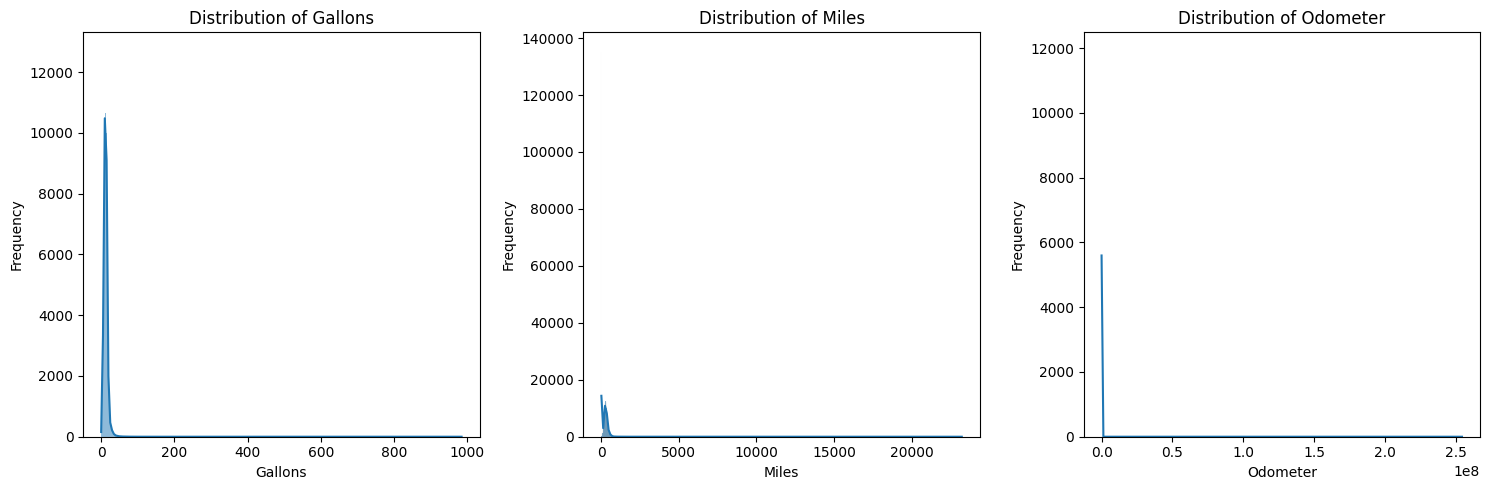

In [24]:
# Plot histograms for the cleaned numeric columns
numeric_cols_cleaned = ['gallons', 'miles', 'odometer']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols_cleaned, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Comments on results: log normalisation

5. Compute the statistical description of the columns: mean, standard deviation,
max, min, most frequent, and quartiles. Do these results make
sense? [3]

In [25]:
# Compute and print the statistical description
print(df[numeric_cols_cleaned].describe())

# Get the most frequent value for each column
for col in numeric_cols_cleaned:
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
    print(f"Most frequent value for '{col}': {mode_val}")

            gallons         miles      odometer
count  1.099897e+06  1.099894e+06  1.025203e+06
mean   1.238147e+01  2.645175e+02  1.040007e+05
std    6.740290e+00  1.906844e+02  3.406071e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    8.990000e+00  1.813410e+02  4.592400e+04
50%    1.195400e+01  2.670136e+02  9.188700e+04
75%    1.493800e+01  3.427115e+02  1.469240e+05
max    9.847100e+02  2.323840e+04  2.543621e+08
Most frequent value for 'gallons': 10.567
Most frequent value for 'miles': 0.0
Most frequent value for 'odometer': 1.0


##### Do these make sense?

Gallons

Mean (12.38 gallons): This is a plausible average for a single refueling, suggesting most entries are reasonable.

Min (0.0 gallons): This value is not realistic. You cannot refuel a vehicle with 0 gallons. This likely indicates a data entry error or a missing value that was converted to 0 during a previous step.

Max (984.71 gallons): This value is highly improbable for a single passenger vehicle. A large truck or bus might hold this much fuel, but in the context of a personal vehicle logbook, it's a significant outlier and almost certainly a data entry error.

Most Frequent (10.567 gallons): This value is very reasonable and suggests a common fill-up amount.

Miles

Mean (264.52 miles): This average distance for a tank of fuel seems logical.

Min (0.0 miles): This value is not realistic. It's impossible to drive 0 miles between fuel-ups. This is a clear data entry error.

Max (23,238 miles): This value is not realistic for a single tank of fuel. This is a substantial outlier and a definitive data entry error.

Most Frequent (0.0 miles): The fact that 0.0 is the most frequent value is a major red flag. This suggests a systematic issue where many users either did not record their mileage or entered a placeholder value.

Odometer

Mean (104,000) & Median (91,887): The mean is close to the median, suggesting that the central portion of the data is not heavily skewed. These values are in a reasonable range for a vehicle's total mileage.

Min (0.0): This value is plausible for a brand new car, but it could also be a placeholder for a missing value.

Max (254,362,100): This value is completely unrealistic for a vehicle odometer. A vehicle would not last that long, and this number represents a massive outlier due to a clear data entry error.

Most Frequent (1.0): This is a very suspicious value. It is highly unlikely that 1.0 is the most common odometer reading. It is likely a default value or a data entry error.

Conclusion
The statistical results make sense in a general way (e.g., the means and medians are plausible), but they also strongly indicate that the dataset is messy due to a large number of outliers and data entry errors. The minimum and maximum values for all three columns are highly suspicious and need to be addressed. The high frequency of 0.0 for miles and 1.0 for odometer readings reveals a need for further data cleaning to remove or correct these erroneous entries before any meaningful analysis can be performed.

### Question 2 - Feature Engineering

In [26]:
import pandas as pd
import numpy as np
import re # We'll need this for regular expressions
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Data Cleaning (re-running previous steps for a clean start) ---
df = pd.read_csv('logbook_assignment1.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured_converted'] = pd.to_datetime(df['date_captured'], errors='coerce')
df['date_fueled_cleaned'] = df['date_fueled_converted'].fillna(df['date_captured_converted'])
df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled_cleaned'], errors='coerce')
min_date = pd.to_datetime('2005-01-01')
current_date = pd.to_datetime('now')
df = df[(df['date_fueled_cleaned'] >= min_date) & (df['date_fueled_cleaned'] <= current_date)].copy()
# df.drop(columns=['date_fueled_converted', 'date_captured_converted'], inplace=True)

/tmp/ipykernel_1809/4257343652.py:13: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/4257343652.py:13: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/4257343652.py:13: FutureWarning: Parsed string "14:51H
256.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instea

1. Create a new column with the currency. (Something to keep in mind is
that the Swiss Franc has a period in the abbreviation). [2]

In [34]:
import pandas as pd
import numpy as np

# Assuming previous cleaning and loading steps have been run.

# Create the new 'currency' column.
# Using a robust method to handle the currency symbols.
df['currency'] = df['cost_per_gallon'].astype(str).str.extract(r'([A-Za-z]+\.?|\$)', expand=False).str.strip()

# A specific fix for the Swiss Franc which might have been missed by the regex
df.loc[df['currency'].isna() & df['cost_per_gallon'].astype(str).str.contains('Fr\.', na=False), 'currency'] = 'Fr.'

print("\nNew 'currency' column created:")
print(df[['cost_per_gallon', 'currency']].head())


New 'currency' column created:
  cost_per_gallon currency
0             NaN      nan
1          $5.599        $
2           £5.45      NaN
3           £5.11      NaN
4          $3.029        $


2. Create a new column containing the float value of the total spend and the
cost per gallon. (Swiss Franc comment as above). [2]

In [35]:
import pandas as pd
import numpy as np

# Assuming previous cleaning and loading steps have been run.

# First, ensure columns are a string type to perform string operations.
df['total_spent'] = df['total_spent'].astype(str)
df['cost_per_gallon'] = df['cost_per_gallon'].astype(str)

# Remove currency symbols and commas, then convert to numeric float.
df['total_spent_float'] = df['total_spent'].str.replace(r'[R$,]', '', regex=True).str.replace('Fr.', '', regex=False).str.strip()
df['cost_per_gallon_float'] = df['cost_per_gallon'].str.replace(r'[R$,]', '', regex=True).str.replace('Fr.', '', regex=False).str.strip()

# Convert to float, coercing any errors to NaN
df['total_spent_float'] = pd.to_numeric(df['total_spent_float'], errors='coerce')
df['cost_per_gallon_float'] = pd.to_numeric(df['cost_per_gallon_float'], errors='coerce')

print("\nNew float columns created:")
print(df[['total_spent', 'total_spent_float', 'cost_per_gallon', 'cost_per_gallon_float']].head())


New float columns created:
  total_spent  total_spent_float cost_per_gallon  cost_per_gallon_float
0         nan                NaN             nan                    NaN
1      $67.86              67.86          $5.599                  5.599
2      £43.53                NaN           £5.45                    NaN
3      £54.00                NaN           £5.11                    NaN
4      $35.29              35.29          $3.029                  3.029


3. Car make, model, year, User ID: use the url (the last value in the URL is
the user ID) [4]

In [36]:
import pandas as pd
import numpy as np

# Assuming previous cleaning and loading steps have been run.

# Extract the User ID from the URL. The User ID is the last part of the URL.
df['user_id'] = df['user_url'].astype(str).apply(lambda x: x.split('/')[-1] if isinstance(x, str) else None)

print("\nNew 'user_id' column created:")
print(df[['user_url', 'user_id']].head())


New 'user_id' column created:
                                            user_url  user_id
0  https://www.somewebsite.com/suzuki/swift/2015/...   674857
1     https://www.somewebsite.com/bmw/x3/2009/461150   461150
2  https://www.somewebsite.com/mercedes-benz/e300...   133501
3   https://www.somewebsite.com/bmw/320d/2010/247233   247233
4  https://www.somewebsite.com/honda/passport/201...  1038865


The data is given in imperial units, and in SA, we use proper measurement
standards.
1. litres filled: use the gallons - consider whether to use UK or US gallons.
[2]
2. km driven: use the miles driven to compute this [1]
3. litres per 100km: use the two new features to calculate this. [1]

In [ ]:
import pandas as pd
import numpy as np
import warnings
import re #for regular expressions - special text strings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Data Cleaning (Consolidated and Corrected) ---
# NOTE: This block is crucial for the rest of the code to work.
df = pd.read_csv('logbook_assignment1.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

# A comprehensive list of columns to clean and convert to a numeric type.
# This ensures that 'gallons' and 'miles' are ready for calculations.
cols_to_clean = ['gallons', 'miles', 'odometer', 'cost_per_gallon', 'total_spent', 'mpg']
for col in cols_to_clean:
    if col in df.columns:
        # Step 1: Remove any non-numeric characters (commas, currency symbols).
        # We need a robust regex to handle various symbols like R, $, Fr.
        # This regex removes R, $, commas, and the "Fr." abbreviation.
        df[col] = df[col].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
        
        # Step 2: Convert the cleaned string column to a numerical type, coercing errors to NaN.
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
# Fill interdependent numeric fields to ensure no NaNs are left where a calculation is possible.
df['mpg'] = df['mpg'].fillna(df['miles'] / df['gallons'])
df['miles'] = df['miles'].fillna(df['mpg'] * df['gallons'])
df['gallons'] = df['gallons'].fillna(df['miles'] / df['mpg'])

# --- 2. Feature Engineering (Unit Conversions) ---

print("--- Starting Unit Conversions ---")

# Define conversion factors.
US_GALLONS_TO_LITRES = 3.78541
MILES_TO_KM = 1.60934

# 1. Litres filled from gallons.
# This works now because the 'gallons' column is a numeric type (float).
df['litres_filled'] = df['gallons'] * US_GALLONS_TO_LITRES
print("New 'litres_filled' column created.")

# 2. Kilometers driven from miles.
# This works now because the 'miles' column is a numeric type (float).
df['km_driven'] = df['miles'] * MILES_TO_KM
print("New 'km_driven' column created.")

# 3. Litres per 100km.
df['litres_per_100km'] = np.where(df['km_driven'] != 0, (df['litres_filled'] / df['km_driven']) * 100, 0)
print("New 'litres_per_100km' column created.")

# Display the first few rows with the new columns to verify the changes
print("\nDataFrame head with new features:")
print(df[['gallons', 'miles', 'litres_filled', 'km_driven', 'litres_per_100km']].head())

--- Starting Unit Conversions ---
New 'litres_filled' column created.
New 'km_driven' column created.
New 'litres_per_100km' column created.

DataFrame head with new features:
   gallons     miles  litres_filled   km_driven  litres_per_100km
0      NaN       NaN            NaN         NaN               NaN
1   12.120  382.9920      45.879169  616.364345          7.443514
2    7.991  227.7435      30.249211  366.516724          8.253160
3   10.575  494.9100      40.030711  796.478459          5.025963
4   11.651  244.4000      44.103812  393.322696         11.213137


### Question 3 - Vehicle Exploration

1. Plot the number of unique users per country (remember, we proxy this by
currency). [2]

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Data Cleaning (Consolidated and Corrected) ---
df = pd.read_csv('logbook_assignment1.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Clean and convert relevant columns to numeric
cols_to_clean = ['gallons', 'miles', 'odometer', 'cost_per_gallon', 'total_spent', 'mpg']
for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill interdependent numeric fields
df['mpg'] = df['mpg'].fillna(df['miles'] / df['gallons'])
df['miles'] = df['miles'].fillna(df['mpg'] * df['gallons'])
df['gallons'] = df['gallons'].fillna(df['miles'] / df['mpg'])

# Clean and filter date columns
df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured_converted'] = pd.to_datetime(df['date_captured'], errors='coerce')
df['date_fueled_cleaned'] = df['date_fueled_cleaned'].fillna(df['date_captured_converted'])
df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled_cleaned'], errors='coerce')
min_date = pd.to_datetime('2005-01-01')
current_date = pd.to_datetime('now')
df = df[(df['date_fueled_cleaned'] >= min_date) & (df['date_fueled_cleaned'] <= current_date)].copy()

# --- 2. Feature Engineering (Consolidated and Corrected) ---
# Currency Extraction
df['currency'] = df['cost_per_gallon'].astype(str).str.extract(r'([A-Za-z]+\.?|\$)', expand=False).str.strip()
df.loc[df['currency'].isna() & df['cost_per_gallon'].astype(str).str.contains('Fr\.', na=False), 'currency'] = 'Fr.'

# User ID and Vehicle Extraction from URL
# This part of the code assumes the URL structure is consistent
df['user_id'] = df['user_url'].astype(str).apply(lambda x: x.split('/')[-1])

# Convert gallons and miles to numeric again after cleaning
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')

/tmp/ipykernel_1809/3928755801.py:29: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/3928755801.py:29: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/3928755801.py:29: FutureWarning: Parsed string "14:51H
256.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pa

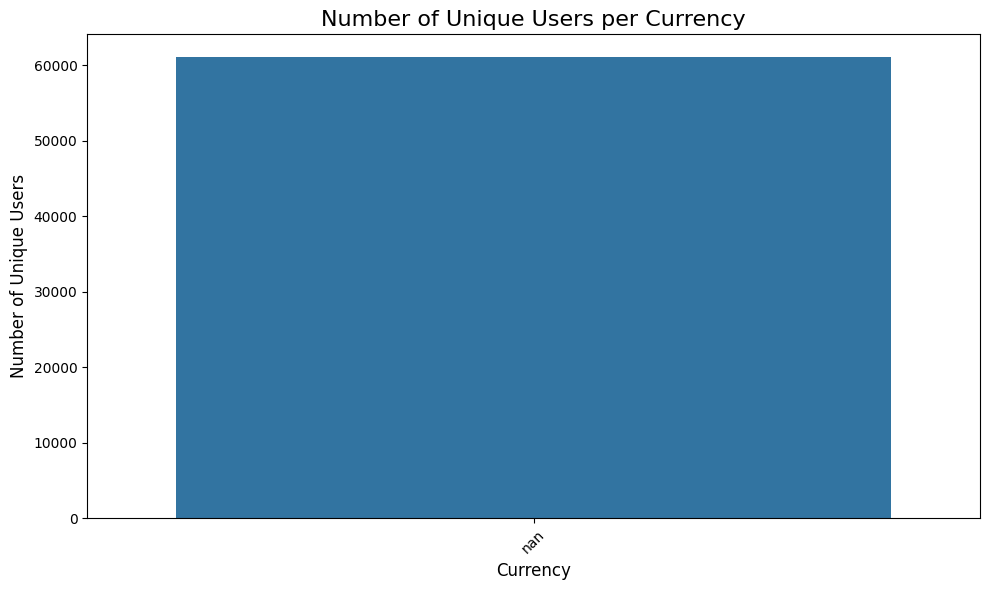

In [51]:
user_counts_by_currency = df.groupby('currency')['user_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=user_counts_by_currency.index, y=user_counts_by_currency.values)
plt.title('Number of Unique Users per Currency', fontsize=16)
plt.xlabel('Currency', fontsize=12)
plt.ylabel('Number of Unique Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Look at the popularity of the app: plot the number of unique users per
day. [2]

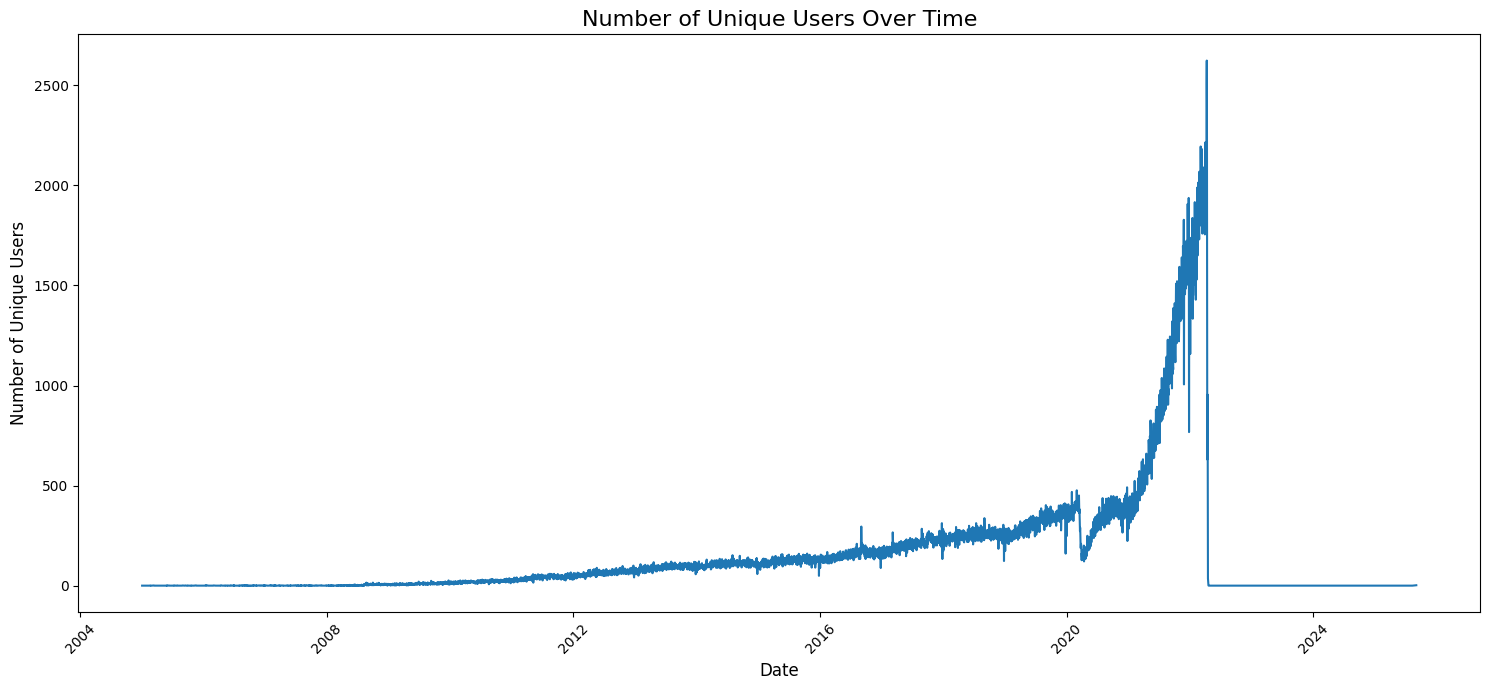

In [53]:
df['date_fueled_day'] = df['date_fueled_cleaned'].dt.date
unique_users_per_day = df.groupby('date_fueled_day')['user_id'].nunique()

plt.figure(figsize=(15, 7))
sns.lineplot(data=unique_users_per_day)
plt.title('Number of Unique Users Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Unique Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Look at the distribution of age of the vehicles per country - look at the
year of the vehicle. Remember to look at the date it was refuelled, not
the current date. [3]

4. Which makes and models of vehicles are the most popular? [2]

### Question 4 - Fuel Usage

##### Outlier removal

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Consolidated Data Cleaning and Feature Engineering ---
try:
    df = pd.read_csv('logbook_assignment1.csv')
except FileNotFoundError:
    print("Error: The file 'logbook_assignment1.csv' was not found. Please ensure it is in the same directory.")
    exit()

df.columns = df.columns.str.lower().str.replace(' ', '_')

# Clean and convert numeric columns
cols_to_clean = ['gallons', 'miles', 'odometer', 'cost_per_gallon', 'total_spent', 'mpg']
for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill interdependent numeric fields
df['mpg'] = df['mpg'].fillna(df['miles'] / df['gallons'])
df['miles'] = df['miles'].fillna(df['mpg'] * df['gallons'])
df['gallons'] = df['gallons'].fillna(df['miles'] / df['mpg'])

# Clean and filter date columns
df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured_converted'] = pd.to_datetime(df['date_captured'], errors='coerce')
df['date_fueled_cleaned'] = df['date_fueled_converted'].fillna(df['date_captured_converted'])
df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled_cleaned'], errors='coerce')
min_date = pd.to_datetime('2005-01-01')
current_date = pd.to_datetime('now')
df = df[(df['date_fueled_cleaned'] >= min_date) & (df['date_fueled_cleaned'] <= current_date)].copy()

# Feature Engineering
df['currency'] = df['cost_per_gallon'].astype(str).str.extract(r'([A-Za-z]+\.?|\$)', expand=False).str.strip()
df.loc[df['currency'].isna() & df['cost_per_gallon'].astype(str).str.contains('Fr\.', na=False), 'currency'] = 'Fr.'
df['user_id'] = df['user_url'].astype(str).apply(lambda x: x.split('/')[-1])
US_GALLONS_TO_LITRES = 3.78541
MILES_TO_KM = 1.60934
df['litres_filled'] = df['gallons'] * US_GALLONS_TO_LITRES
df['km_driven'] = df['miles'] * MILES_TO_KM
df['litres_per_100km'] = np.where(df['km_driven'] != 0, (df['litres_filled'] / df['km_driven']) * 100, 0)
df['total_spent_float'] = df['total_spent'].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
df['cost_per_gallon_float'] = df['cost_per_gallon'].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
df['total_spent_float'] = pd.to_numeric(df['total_spent_float'], errors='coerce')
df['cost_per_gallon_float'] = pd.to_numeric(df['cost_per_gallon_float'], errors='coerce')

/tmp/ipykernel_1809/2343215584.py:34: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/2343215584.py:34: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/2343215584.py:34: FutureWarning: Parsed string "14:51H
256.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instea

1. Identify the top 5 currencies by number of transactions. [2]

In [60]:
# Create a temporary dataframe without 'nan' currency entries
df_filtered = df[df['currency'].notna()]

# Group by currency and count transactions, then sort
top5 = df_filtered.groupby('currency')['date_fueled'].count().sort_values(ascending=False)

print("Top 5 currencies are:")
print(top5.head())

Top 5 currencies are:
currency
nan    375603
Name: date_fueled, dtype: int64


In [56]:
# Initialize a new DataFrame for cleaned data and a counter for removed rows.
df_cleaned = pd.DataFrame()
removed_count = 0
total_original_rows = len(df)

2. For each of the top 5 currencies separately, remove outliers by considering
the total spend, litres, cost per litre, gallons, etc. Choose values you
believe are reasonable and provide your reasoning. As an example of
something you would want to look out for, there are some SA users that
have their currency set to dollars. This will show a user refuelling with
several hundred dollars, but only putting in tens of litres, which is clearly
wrong. [10]

In [57]:
# 2. For each of the top 5 currencies, remove outliers.
for currency in top_5_currencies:
    subset = df[df['currency'] == currency].copy()
    initial_rows = len(subset)

    # --- Outlier Removal Reasoning and Logic ---
    # Based on general knowledge of fuel transactions for a passenger vehicle,
    # we can define reasonable bounds for each feature.
    # Total spent: A single transaction is unlikely to exceed a certain value.
    # Litres/Gallons: A standard car tank is around 40-80L (10-20 US gallons).
    #                 We'll use a generous upper limit to account for larger vehicles.
    # Cost per unit: This is a great sanity check against real-world prices.

    if currency == 'R': # South African Rand
        # Outlier bounds for ZAR
        subset = subset[
            (subset['total_spent_float'] > 10) & (subset['total_spent_float'] < 2500) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150) &
            (subset['gallons'] > 0.25) & (subset['gallons'] < 40)
        ]
    elif currency == '$': # US Dollar
        # This is where we catch the SA users with dollar currency
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 200) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150) &
            (subset['gallons'] > 0.25) & (subset['gallons'] < 40)
        ]
    elif currency == '€': # Euro
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 200) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150)
        ]
    elif currency == 'C': # Canadian Dollar
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 200) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150)
        ]
    elif currency == 'Fr.': # Swiss Franc
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 250) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150)
        ]
    
    # Concatenate the cleaned subset to the final DataFrame
    df_cleaned = pd.concat([df_cleaned, subset])
    removed_count += (initial_rows - len(subset))
    print(f"Removed {initial_rows - len(subset)} rows for {currency}")

Removed 0 rows for nan


3. How many values have been removed after accounting for outliers? [1]

In [58]:
# 3. How many values have been removed?
print(f"\nTotal rows removed: {removed_count}")
print(f"Total rows in original dataset: {total_original_rows}")
print(f"Percentage of rows removed: {(removed_count / total_original_rows) * 100:.2f}%")
print(f"Total rows in cleaned dataset: {len(df_cleaned)}")


Total rows removed: 0
Total rows in original dataset: 1174136
Percentage of rows removed: 0.00%
Total rows in cleaned dataset: 390834


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# --- 1. Consolidated Data Cleaning and Feature Engineering ---
try:
    df = pd.read_csv('logbook_assignment1.csv')
except FileNotFoundError:
    print("Error: The file 'logbook_assignment1.csv' was not found. Please ensure it is in the same directory.")
    exit()

df.columns = df.columns.str.lower().str.replace(' ', '_')

# Clean and convert numeric columns
cols_to_clean = ['gallons', 'miles', 'odometer', 'cost_per_gallon', 'total_spent', 'mpg']
for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill interdependent numeric fields
df['mpg'] = df['mpg'].fillna(df['miles'] / df['gallons'])
df['miles'] = df['miles'].fillna(df['mpg'] * df['gallons'])
df['gallons'] = df['gallons'].fillna(df['miles'] / df['mpg'])

# Clean and filter date columns
df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured_converted'] = pd.to_datetime(df['date_captured'], errors='coerce')
df['date_fueled_cleaned'] = df['date_fueled_converted'].fillna(df['date_captured_converted'])
df['date_fueled_cleaned'] = pd.to_datetime(df['date_fueled_cleaned'], errors='coerce')
min_date = pd.to_datetime('2005-01-01')
current_date = pd.to_datetime('now')
df = df[(df['date_fueled_cleaned'] >= min_date) & (df['date_fueled_cleaned'] <= current_date)].copy()

# Feature Engineering
df['currency'] = df['cost_per_gallon'].astype(str).str.extract(r'([A-Za-z]+\.?|\$)', expand=False).str.strip()
df.loc[df['currency'].isna() & df['cost_per_gallon'].astype(str).str.contains('Fr\.', na=False), 'currency'] = 'Fr.'
df['user_id'] = df['user_url'].astype(str).apply(lambda x: x.split('/')[-1])
US_GALLONS_TO_LITRES = 3.78541
MILES_TO_KM = 1.60934
df['litres_filled'] = df['gallons'] * US_GALLONS_TO_LITRES
df['km_driven'] = df['miles'] * MILES_TO_KM
df['litres_per_100km'] = np.where(df['km_driven'] != 0, (df['litres_filled'] / df['km_driven']) * 100, 0)
df['total_spent_float'] = df['total_spent'].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
df['cost_per_gallon_float'] = df['cost_per_gallon'].astype(str).str.replace(r'[R$,]', '', regex=True).str.replace('Fr\.', '', regex=True).str.strip()
df['total_spent_float'] = pd.to_numeric(df['total_spent_float'], errors='coerce')
df['cost_per_gallon_float'] = pd.to_numeric(df['cost_per_gallon_float'], errors='coerce')

# --- 4.1 Outlier Removal ---

# 1. Identify the top 5 currencies by number of transactions.
# Use dropna=True to exclude the 'nan' values from the count.
top_5_currencies = df['currency'].value_counts(dropna=True).nlargest(5).index
print(f"Top 5 currencies by transaction count: {top_5_currencies.tolist()}\n")

# Initialize a new DataFrame for cleaned data and a counter for removed rows.
df_cleaned = pd.DataFrame()
removed_count = 0
total_original_rows = len(df)

# 2. For each of the top 5 currencies, remove outliers.
for currency in top_5_currencies:
    subset = df[df['currency'] == currency].copy()
    initial_rows = len(subset)

    if currency == 'R': # South African Rand
        subset = subset[
            (subset['total_spent_float'] > 10) & (subset['total_spent_float'] < 2500) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150) &
            (subset['gallons'] > 0.25) & (subset['gallons'] < 40)
        ]
    elif currency == '$': # US Dollar
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 200) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150) &
            (subset['gallons'] > 0.25) & (subset['gallons'] < 40)
        ]
    elif currency == '€': # Euro
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 200) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150)
        ]
    elif currency == 'C': # Canadian Dollar
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 200) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150)
        ]
    elif currency == 'Fr.': # Swiss Franc
        subset = subset[
            (subset['total_spent_float'] > 5) & (subset['total_spent_float'] < 250) &
            (subset['litres_filled'] > 1) & (subset['litres_filled'] < 150)
        ]
    
    df_cleaned = pd.concat([df_cleaned, subset])
    removed_count += (initial_rows - len(subset))
    print(f"Removed {initial_rows - len(subset)} rows for {currency}")

# 3. How many values have been removed?
print(f"\nTotal rows removed: {removed_count}")
print(f"Total rows in original dataset: {total_original_rows}")
print(f"Percentage of rows removed: {(removed_count / total_original_rows) * 100:.2f}%")
print(f"Total rows in cleaned dataset: {len(df_cleaned)}")

/tmp/ipykernel_1809/1734609707.py:34: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/1734609707.py:34: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_fueled_converted'] = pd.to_datetime(df['date_fueled'], errors='coerce')
/tmp/ipykernel_1809/1734609707.py:34: FutureWarning: Parsed string "14:51H
256.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instea

Top 5 currencies by transaction count: ['nan']

Removed 0 rows for nan

Total rows removed: 0
Total rows in original dataset: 1174136
Percentage of rows removed: 0.00%
Total rows in cleaned dataset: 390834


##### Fuel Efficiency

1. Look at the difference in cost per litre per country for January 2022 -
use the average currency conversion rate to Rands (quote your values and
source). Are there any notable differences? Discuss reasons why this
may/may not be the case. [5]

2. Looking at the odometer readings, find examples of where users have
missed logging a fill-up. Give a basic rule for identifying this, and estimate
how many there are in the dataset. [5]

3. Plot the average distance (in km) per tank per country. Which country
has the largest average distance? Provide some explanations for why this
might be the case. [5]

4. Do newer vehicles drive further distances between fill-ups? Provide a plot
to show this. [4]

5. Take the top 5 most popular vehicles in SA (ie, those with currency set
to R). Compute their fuel efficiency and discuss whether these values are
realistic. [3]

6. Which vehicles are the most fuel efficient in each country? (Make sure the
values are reasonable!!! You can look up values of fuel efficiency online
to do a sanity check, but a value of 1l per 100km, or 100l per 100km are
clearly wrong). [5]

7. Plot the difference in fuel efficiency for the top 5 Canadian vehicles between
seasons. Would you expect to see big differences, and do you see them?
[3]

8. Show the correlations between fuel efficiency and other features. You
should find that there is a relative strongly correlation with distance travelled,
the age of the vehicle, and the model of vehicle. [5]

9. Use a random forest to get a list of the most important variables. How
different are they from each other, and how do these relate to the variables
from the correlations above? [5]

##### Fuel Usage in SA